In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nanip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nanip\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\nanip\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\nanip\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding = 'ISO-8859-1')

In [3]:
df = df.head(1000)
df.head()

,pol,id of the tweet,date of the tweet,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df.shape

(1000, 6)

In [5]:
example = df['text'][51]
print(example)

@andywana Not sure what they are, only that they are PoS! As much as I want to, I dont think can trade away company assets sorry andy! 


In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['@', 'andywana', 'Not', 'sure', 'what', 'they', 'are', ',', 'only', 'that']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('@', 'NNS'),
 ('andywana', 'VBZ'),
 ('Not', 'RB'),
 ('sure', 'JJ'),
 ('what', 'WP'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 (',', ','),
 ('only', 'RB'),
 ('that', 'IN')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  @/NNS
  andywana/VBZ
  Not/RB
  sure/JJ
  what/WP
  they/PRP
  are/VBP
  ,/,
  only/RB
  that/IN
  they/PRP
  are/VBP
  (ORGANIZATION PoS/JJ)
  !/.
  As/RB
  much/JJ
  as/IN
  I/PRP
  want/VBP
  to/TO
  ,/,
  I/PRP
  dont/VBP
  think/VBP
  can/MD
  trade/VB
  away/RP
  company/NN
  assets/NNS
  sorry/VBP
  andy/JJ
  !/.)


In [9]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nanip\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
sia .polarity_scores(example)

{'neg': 0.138, 'neu': 0.754, 'pos': 0.108, 'compound': -0.2134}

In [11]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['text']
    myid = row['id of the tweet']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'id of the tweet'})
vaders = vaders.merge(df,how='left')

In [13]:
vaders

,id of the tweet,neg,neu,pos,compound,pol,date of the tweet,query,user,text
0,1467810672,0.303,0.697,0.000,-0.7500,0,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,0.000,0.833,0.167,0.4939,0,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,0.321,0.500,0.179,-0.2500,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,0.241,0.759,0.000,-0.6597,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,0.000,1.000,0.000,0.0000,0,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...,...,...,...,...
995,1468055791,0.530,0.470,0.000,-0.7764,0,Mon Apr 06 23:28:49 PDT 2009,NO_QUERY,ecjc,"@kisluvkis oh that is very sad, poor boy."
996,1468055852,0.370,0.630,0.000,-0.8622,0,Mon Apr 06 23:28:50 PDT 2009,NO_QUERY,Saphyre1969,"@JonathanRKnight @silver_tulip27 Um, that woul..."
997,1468056316,0.221,0.779,0.000,-0.2462,0,Mon Apr 06 23:28:58 PDT 2009,NO_QUERY,nurainiffah,I'm doing my homework. It's gosh darn hard!!
998,1468056420,0.247,0.449,0.303,0.1280,0,Mon Apr 06 23:29:00 PDT 2009,NO_QUERY,francheza,definitely no vacation for me... http://plur...


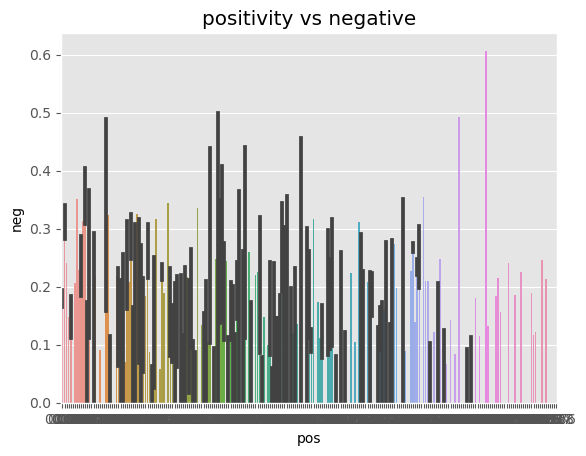

In [14]:
ax = sns.barplot(data=vaders, x='pos',y='neg')
ax.set_title('positivity vs negative')
plt.show()

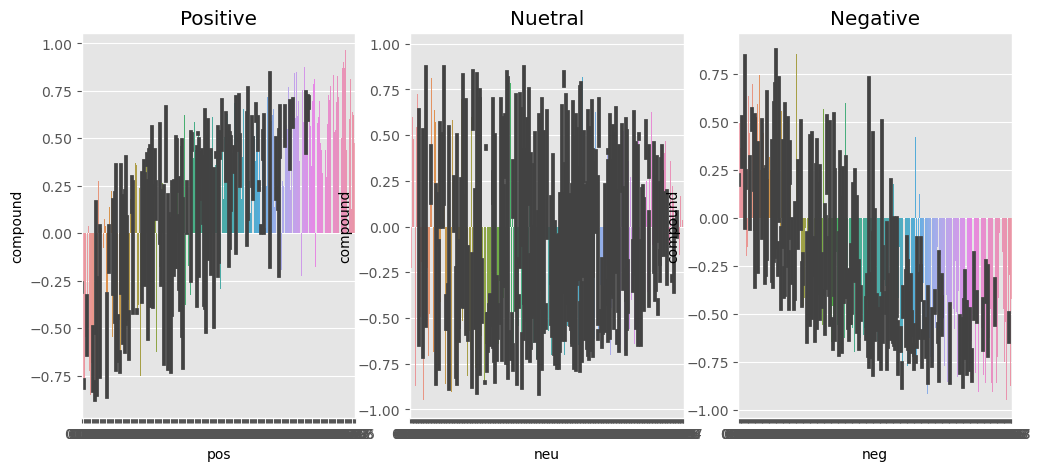

In [15]:
fig, axs = plt.subplots(1,3,figsize=(12,5))
sns.barplot(data=vaders,x='pos',y = 'compound',ax=axs[0])
sns.barplot(data=vaders,x='neu',y = 'compound',ax=axs[1])
sns.barplot(data=vaders,x='neg',y = 'compound',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Nuetral')
axs[2].set_title('Negative')
plt.show()

In [16]:
vaders.query('pol == 1').sort_values('vader_pos',ascending=False)['text'].values[0]

KeyError: 'vader_pos'

In [17]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [19]:
df['text'][0]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

In [21]:
sent_pipeline(df['text'][0])

[{'label': 'NEGATIVE', 'score': 0.9980071187019348}]